In [13]:
import pandas as pd
import glob
from os import path

from matplotlib import pyplot as plt

In [14]:
left_col, right_col = "Begin Time (s)", "End Time (s)"
top_col, bot_col = "High Freq (Hz)", "Low Freq (Hz)"
class_col, class_conf_col = "Species", "Species Confidence"

In [15]:
def get_all_annotations_in_directory(directory="/home/jackson/Downloads"):
    return glob.glob(path.join(directory, "*.*-*.txt"))

In [16]:
annot_filepaths = get_all_annotations_in_directory()
annot_filepaths

['/home/jackson/Downloads/671658014.180930003542-AW.txt',
 '/home/jackson/Downloads/671658014.180929123551-AW.txt']

In [17]:
def read_annotations(fname, verbose=False):
    annotations = pd.read_csv(fname, sep="\t")
    if verbose:
        print("Read {} annotations from {}".format(len(annotations), fname))
        print("Columns:", ",".join([" {} ({})".format(c, type(c)) for c in annotations.columns]))
    return annotations


def save_annotations(annots, fname, verbose=False):
    annots.to_csv(fname, index=False, sep="\t", float_format='%g')
    if verbose:
        print("Saved {} annotations to {}".format(len(annots), fname))

In [18]:
required_columns = [
    "Species",
    "Begin Time (s)",
    "End Time (s)",
    "Low Freq (Hz)",
    "High Freq (Hz)"
]

columns_to_save = [
    "Selection",
    "View",
    "Channel",
    "Begin Time (s)",
    "End Time (s)",
    "Low Freq (Hz)",
    "High Freq (Hz)",
    "Species",
    "Species Confidence",
    "Call Uncertainty"
]

class_map = {
    "Humpback Whale": "hb",
    "humpback whale": "hb",
    "Sea Lion": "sl",
    "sea lion": "sl",
    "sl": "sl",
    "hb whale": "hb",
    "hb?": "hb",
    "hhb": "hb",
    "hb": "hb",
    "jn": "hb",
    "rf": "rf",
    "?": "?",
    "mech": "?",
    "mechanical": "?"
}

In [27]:
annotation_filepath = annot_filepaths[1]
annotations = read_annotations(annotation_filepath, verbose=True)
#annotations["Species Confidence"] = 5.0
#annotations["Call Uncertainty"] = 0.0
#annotations["Species Confidence"] = annotations["Species confidence"]
annotations["Call Uncertainty"] = annotations["Call uncertainty"]
annotations.loc[annotations["Species Confidence"].isna(), "Species Confidence"] = 5.0
annotations.loc[annotations["Species Confidence"] == 13.0, "Species Confidence"] = 3.0
annotations.loc[annotations["Species Confidence"] == 14.0, "Species Confidence"] = 4.0
annotations.loc[annotations["Species Confidence"] == 44.0, "Species Confidence"] = 4.0
annotations.loc[annotations["Species Confidence"] == 33.0, "Species Confidence"] = 3.0
#annotations["Call Uncertainty"] = annotations["Call Certainty"]
annotations.loc[annotations["Call Uncertainty"].isna(), "Call Uncertainty"] = 0.0
annotations.loc[annotations["Call Uncertainty"] > 1.0, "Call Uncertainty"] = 1.0
#annotations["Species"] = annotations["species"]
annotations["Species"] = annotations["Species"].map(class_map)
annotations.dropna(subset=required_columns, how="any", inplace=True)

Read 565 annotations from /home/jackson/Downloads/671658014.180929123551-AW.txt
Columns:  Selection (<class 'str'>), View (<class 'str'>), Channel (<class 'str'>), Begin Time (s) (<class 'str'>), End Time (s) (<class 'str'>), Low Freq (Hz) (<class 'str'>), High Freq (Hz) (<class 'str'>), Species (<class 'str'>), Species Confidence (<class 'str'>), Call uncertainty (<class 'str'>)


In [28]:
def get_area(annotation):
    return ((annotation[right_col] - annotation[left_col])
            * (annotation[top_col] - annotation[bot_col]))

In [29]:
areas = []
for i in range(len(annotations)):
    areas.append(get_area(annotations.iloc[i]))
annotations["area"] = pd.Series(areas, index=annotations.index)
annotations["area"].describe()

count     564.000000
mean      377.103724
std       584.325426
min        32.605927
25%       153.896261
50%       256.224880
75%       408.844731
max      7929.498336
Name: area, dtype: float64

In [30]:
annotations.loc[annotations["area"] == 0.0]

,Selection,View,Channel,Begin Time (s),End Time (s),Low Freq (Hz),High Freq (Hz),Species,Species Confidence,Call uncertainty,Call Uncertainty,area


In [ ]:
annotations.drop(2, inplace=True)

In [31]:
annotations.drop("area", axis=1, inplace=True)

Number of Annotations:  564


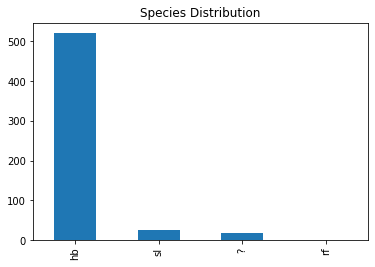

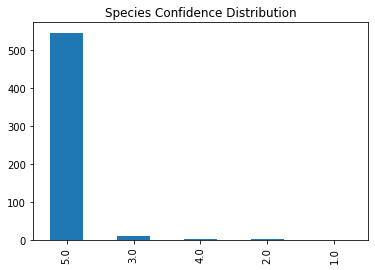

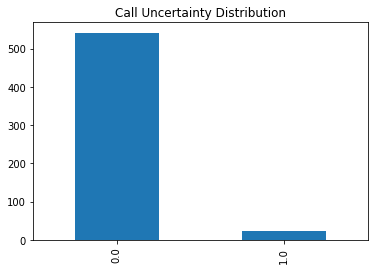

In [32]:
def summarize_annotations(annots):
    print("Number of Annotations: ", len(annots))
    annots["Species"].value_counts(dropna=False).plot.bar(title="Species Distribution")
    plt.show()
    annots["Species Confidence"].value_counts(dropna=False).plot.bar(title="Species Confidence Distribution")
    plt.show()
    annots["Call Uncertainty"].value_counts(dropna=False).plot.bar(title="Call Uncertainty Distribution")
    plt.show()
summarize_annotations(annotations)

In [33]:
save_annotations(annotations[columns_to_save], annotation_filepath+"_rev")